<h4 align="center">LINK ANALYSIS ALGORITHM</h4>

<h4 align="center">PART A - HUBS AND AUTHORITY USING HITS ALGORITHM</h4>

In [3]:
import math
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Verify the consistency of results obtained with the Custom Implementation using K=4.

vertices_names = ['A', 'B', 'C', 'D','E']
num_vertices = 5
k=4

In [5]:
A = [[1,0, 0, 0, 0],
 [1, 0, 1, 0, 1],
 [1, 0, 0, 1, 1],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1]]

In [6]:
# find the outbound vertices

outbound_vertices = []

for i in range(5):
    temp = []
    for j in range(5):
        if(A[i][j] == 1):
            temp.append(j)
    outbound_vertices.append(temp)

outbound_vertices

[[0], [0, 2, 4], [0, 3, 4], [0], [0, 4]]

In [7]:
# find the inbound vertices

inbound_vertices = []

for i in range(5):
    temp = []
    for j in range(5):
        if(A[j][i] == 1):
            temp.append(j)
    inbound_vertices.append(temp)

inbound_vertices

[[0, 1, 2, 3, 4], [], [1], [2], [1, 2, 4]]

In [8]:
authority_score = [1] * 5
hub_score = [1] * 5

In [9]:
for itr in range(k) :
    old_authority_scores = authority_score[:]
    old_hub_scores = hub_score[:]
    for i in range(5) :
        authority_score[i] = sum([old_hub_scores[j] for j in inbound_vertices[i]])
        hub_score[i] = sum([old_authority_scores[j] for j in outbound_vertices[i]])
    a_normal = math.sqrt(sum([i**2 for i in authority_score]))
    h_normal = math.sqrt(sum([i**2 for i in hub_score]))
    for i in range(5) :
        authority_score[i] = authority_score[i] / a_normal
        hub_score[i] = hub_score[i] / h_normal

In [10]:
print(f"The Authority scores of the nodes after {k} iterations : ")
for i in range(5) :
    print(vertices_names[i], " : ", authority_score[i])

The Authority scores of the nodes after 4 iterations : 
A  :  0.7668945054590078
B  :  0.0
C  :  0.2013098076829896
D  :  0.2013098076829896
E  :  0.5751708790942559


In [11]:
print(f"The Hub scores of the nodes after {k} iterations : ")
for i in range(5) :
    print(vertices_names[i], " : ", hub_score[i])

The Hub scores of the nodes after 4 iterations : 
A  :  0.28010687597551287
B  :  0.5524330053961504
C  :  0.5524330053961504
D  :  0.28010687597551287
E  :  0.4824062864022721


<h4 align="center"> Use inbuilt HITS Algorithm function using k=4</h4>

In [12]:
G = nx.DiGraph()
G.add_nodes_from(vertices_names)
G.add_edges_from([('A','A'),('B','A'),('B','C'),('B','E'),('C','A'),('C','D'),('C','E'),('D','A'),('E','A'),('E','E')])

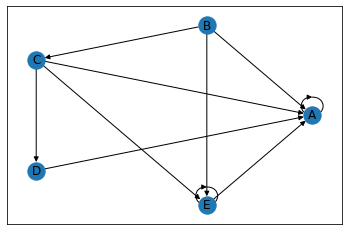

In [13]:
nx.draw_networkx(G, pos=nx.circular_layout(G), arrows=True, with_labels=True)
plt.show()

In [14]:
hub_scores_networkx, authority_scores_networkx = nx.hits(G, normalized = True)

In [15]:
print("The Authority scores of the nodes using Networkx library : ")
for k, v in sorted(authority_scores_networkx.items()):
    print(k, " : ", v)

The Authority scores of the nodes using Networkx library : 
A  :  0.4428026084897247
B  :  -4.773201134294743e-17
C  :  0.11439478302055078
D  :  0.11439478302055077
E  :  0.3284078254691738


In [16]:
print("The Hub scores of the nodes using Networkx library : ")
for k, v in sorted(hub_scores_networkx.items()) :
    print(k, " : ", v)

The Hub scores of the nodes using Networkx library : 
A  :  0.12917130661302934
B  :  0.2583426132260586
C  :  0.2583426132260586
D  :  0.12917130661302934
E  :  0.22497216032182416


In [17]:
# Implement the basic PageRank algorithm using Python to display the rank of ALL pages.

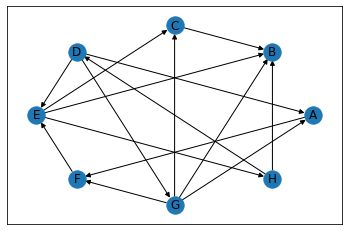

In [18]:
G1 = nx.DiGraph()
vertices_name1 = ['A', 'B', 'C', 'D','E','F','G','H']
G1.add_nodes_from(vertices_names)
G1.add_edges_from([('A','F'),('C','B'),('D','A'),('D','E'),('D','G'),('E','B'),('E','C'),('E','H'),('F','E'),('G','F'), ('G','A'),('G','B'),('G','C'),('H','D'), ('H', 'B')])

nx.draw_networkx(G1, pos=nx.circular_layout(G1), arrows=True, with_labels=True)
plt.show()

In [27]:
# PageRank Algorithm random walk on graph G1
import random
x = random.choice([i for i in vertices_name1])

dict_count = dict()

for i in vertices_name1:
    dict_count[i] = 0

dict_count[x] += 1

for i in range(100000):
    list_n = list(G1.neighbors(x))
    if(len(list_n) == 0):
        x = random.choice([i for i in vertices_name1])
        dict_count[x] += 1
    else:
        x = random.choice(list_n)
        dict_count[x] += 1

print(sorted(dict_count.items(), key=lambda x: x[1], reverse=True))

[('B', 26923), ('E', 18512), ('F', 12442), ('C', 10908), ('H', 9554), ('D', 8037), ('A', 7550), ('G', 6075)]


In [29]:
from networkx import pagerank

print(sorted(pagerank(G1).items(), key=lambda x: x[1], reverse=True))

[('B', 0.2450353582411633), ('E', 0.1799923540181093), ('F', 0.13056974349060702), ('C', 0.11044717161676978), ('H', 0.09578310995085478), ('D', 0.08549280896262565), ('A', 0.08367175769289253), ('G', 0.06900769602697754)]
